<h1><center> <b> Linear Regression </b></center></h1>
<img src="asset/Fitting A Line.png" width="800" height="400" alt="Fitting A Line" />

## Absolute Trick

The absolute trick works by starting with a point and a line.
- A point with coordinates $(p,q)$
- A line represented by $y = w_1x + w_2$.

A line represented by $(p,q)$the absolute trick has two steps:
- add to the y-intercept so that the line moves up
- add to the slope to make the line rotate in the direction of the point

The first possible step is to add 1 to the y-intercept and $p$ to the slope, giving us the equation $y = (w_1+p)x+(w_2+1)$

This ends up being too large of a step, and we have over-corrected our line. Instead, we will utilize a small number called a **learning rate**, referred to as alpha $(α)$, to take smaller steps.

We will add $(1α)$ to the y-intercept, and $(pα)$ to the slope. This gives us the equation
$y = (w_1+pα)x+(w_2+α)$

This works when the point $(p,q)$ is above the line, but when the point is underneath the line we need to subtract in order to move the line appropriately.
$y = (w_1-pα)x+(w_2-α)$

<img src="asset/Absolute Track.png" width="800" height="400" alt="Absolute Trick" />

## Square Trick

Let's look at this vertical distance between the point and the line. The point over the line has coordinates $(p,q)$ and the corresponding point on the line is $(p,q′)$.

The distance between the point and the line is $(q−q′)$.

We take this distance and multiply it into what we add to both the y-intercept and to the slope.
- Update the y-intercept by adding $α(q−q′)$
- Update the slope by adding $pα(q−q′)$.

This gives us the equation $y = (w_1-p(q−q′)α)x+(w_2-(q−q′)α)$

This trick automatically takes care of points that are under the line and we don't need two rules as we had on the absolute trick. We just have the same rule for both.
<img src="asset/Square Track.png" width="800" height="400" alt="Square Track" />

## Gradient Descent
Consider the plot in two dimensions allowing a reality that the plot will be in higher dimensions. We have our weights on the x-axis and our error on the y-axis. And we have an error function. The way to descend is to actually take the derivative or gradient of the error function with respect to the weights. This gradient is going to point to a direction where the function increases the most. Therefore, the negative of this gradient is going to point down in the direction where the function decreases the most. So what we do is we take a step in the direction of the negative of that gradient, this means we are taking our weights wi and changing them to wi minus the derivative of the error with respect to wi.

<img src="asset/Gradient Decent.png" width="800" height="400" alt="Gradient Decent" />

## Error Functions

### Mean Absolute Error
Assume we have a point with coordinates $(x,y)$ and the line is called $\hat{Y}$ since it is our prediction. The corresponding point on the line is $(x,\hat{y})$, and the vertical distance from the point to the line is $(y− \hat{y})$. This is the error.
Our total error is going to be the sum of all these distances for all the points in our dataset.

$Error = \sum_{i=1}^{m} |y_i - \hat{y}_i|$ 

In some cases, we'll use the average or the mean absolute error, which is the sum of all the errors divided by m, the number of points in our dataset.

$Error = \frac{1}{m} \sum_{i=1}^{m} \left| y_i - \hat{y}_i \right|$

Using the sum or the average won't change our algorithms, since that would only scale our error by a constant, namely m.

Notice that we have an absolute value around $(y− \hat{y})$, the reason is that if the point is on top of the line, the distance is $(y− \hat{y})$ , but if it's under the line then it's $(y− \hat{y})$ . We want the error to always be positive, otherwise negative errors will cancel with positive errors.


<img src="asset/Mean Absolute Error.png" width="800" height="400" alt="Mean Absolute Error" />

### Mean Square Error

Assume we still have our point and our prediction, but instead of taking the distance between the point and the prediction, we're going to draw a square with this segment as its side. This area is  $(y− \hat{y})^2$.

Notice that this is always non-negative, so we don't need to worry about absolute values.

Our mean squared error is going to be the average of all these series of squares.

$Error = \frac{1}{2m} \sum_{i=1}^{m} (y_i - \hat{y}_i)^2$

If the point is over the line or underneath the line the square is always going to be a non-negative number because the square of a real number is always going to be non-negative.

<img src="asset/Mean Squared Error.png" width="800" height="400" alt="Mean Squared Error" />

## Minimizing Error Functions

### Mean squared error
Let's start with the mean squared error. Assume we have a point with coordinates $(x,y)$, and a line with the equation $y = w_1x + w_2$.
So $\hat{y}$ is our prediction, and it predicts the y coordinate of the point that matches the x coordinate of the point $(x,y)$, the point 
$(x,\hat{y})$. The error for this point is  $ \frac{1}{2}(y - \hat{y})^2 $, and the mean squared error for this set of points is the average of all these errors. Since the average is a linear function, whatever we do here applies to the entire error.

We know that the gradient descent step uses these two derivatives, namely the derivative with respect to the slope $w_1$ and the derivative with respect to the y-intercept $w_2$. If we calculate the derivatives, we get $ \frac{\partial Error}{\partial w_1} = -(y - \hat{y})x $ for the one respect to the slope and $ \frac{\partial Error}{\partial w_2} = -(y - \hat{y}) $ for the one with respect to the y-intercept $w_2$.

Notice that the length of this red segment is precisely $ (y - \hat{y}) $ and the length of this green segment is precisely x.
 
### Development of the derivative of the error function
Notice that we've defined the squared error to be 

$Error =  \frac{1}{2}(y - \hat{y})^2 $

Also, we've defined the prediction to be $y = w_1x + w_2$

So to calculate the derivative of the Error with respect to $w_1$, we simply use the chain rule:

$ \frac{\partial Error}{\partial w_1} = \frac{\partial Error}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial w_1} $

The first factor of the right-hand side is the derivative of the Error with respect to the prediction $ \hat{y} $, which is $ (y - \hat{y}) $. 

The second factor is the derivative of the prediction with respect to $w_1$, which is simply $ x $.
Therefore, the derivative is

$ \frac{\partial Error}{\partial w_1} = -(y - \hat{y}) \cdot x $

### Batch vs Stochastic Gradient Descent
At this point, it seems that we've seen two ways of doing linear regression.

- By applying the squared (or absolute) trick at every point in our data one by one, and repeating this process many times.
- By applying the squared (or absolute) trick at every point in our data all at the same time, and repeating this process many times. <br>

More specifically, the squared (or absolute) trick, when applied to a point, gives us some values to add to the weights of the model. We can add these values, update our weights, and then apply the squared (or absolute) trick on the next point. Or we can calculate these values for all the points, add them, and then update the weights with the sum of these values.

The latter is called *batch gradient descent*. The former is called *stochastic gradient descent*.

<img src="asset/batch-stochastic.png" width="1000" height="400" alt="batch-stochastic" />

The question is, which one is used in practice?

Actually, in most cases, neither. Think about this: If your data is huge, both are a bit slow, computationally. The best way to do linear regression, is to split your data into many small batches. Each batch, with roughly the same number of points. Then, use each batch to update your weights. This is still called mini-batch gradient descent.

<img src="asset/minibatch.png" width="600" height="350" alt="minibatch" />

## Lesson 2.16 Mini-Batch Gradient Descent 

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# Setting a random seed, feel free to change it and see different solutions.
np.random.seed(50)

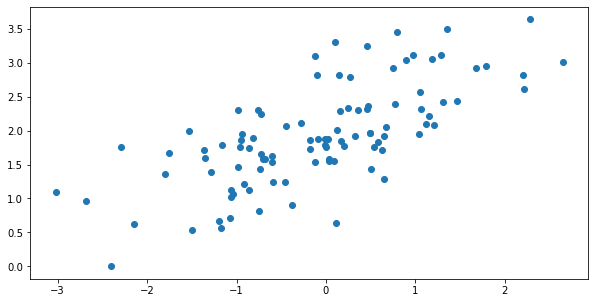

In [2]:
data = np.loadtxt('datasets/batch_gradient.csv', delimiter = ',')

df = pd.DataFrame(data)

fig, ax = plt.subplots(figsize=(10,5 ))
ax.scatter(df[0], df[1])
plt.show()

In [3]:
# step for linear regression, following a squared error rule. See the docstring for parameters and returned variables.

def MSEStep(X, y, W, b, learn_rate = 0.005):
    """
    This function implements the gradient descent step for squared error as a
    performance metric.
    
    Parameters
    X : array of predictor features
    y : array of outcome values
    W : predictor feature coefficients
    b : regression function intercept
    learn_rate : learning rate

    Returns
    W_new : predictor feature coefficients following gradient descent step
    b_new : intercept following gradient descent step
    """
    
     # compute errors
    y_pred = np.matmul(X, W) + b
    error = y - y_pred
    
    # compute steps
    W_new = W + learn_rate * np.matmul(error, X)
    b_new = b + learn_rate * error.sum()
    return W_new, b_new

In [4]:
# The gradient descent step will be performed multiple times on the provided dataset, and the returned list of
# regression coefficients will be plotted.


def miniBatchGD(X, y, batch_size = 20, learn_rate = 0.005, num_iter = 25):
    
    """
    This function performs mini-batch gradient descent on a given dataset.

    Parameters
    X : array of predictor features
    y : array of outcome values
    batch_size : how many data points will be sampled for each iteration
    learn_rate : learning rate
    num_iter : number of batches used

    Returns
    regression_coef : array of slopes and intercepts generated by gradient
      descent procedure
    """
    
    n_points = X.shape[0]
    W = np.zeros(X.shape[1]) # coefficients
    b = 0 # intercept
    
    # run iterations
    regression_coef = [np.hstack((W,b))]
    for _ in range(num_iter):
        batch = np.random.choice(range(n_points), batch_size)
        X_batch = X[batch,:]
        y_batch = y[batch]
        
        W, b = MSEStep(X_batch, y_batch, W, b, learn_rate)
        regression_coef.append(np.hstack((W,b)))
    
    return regression_coef

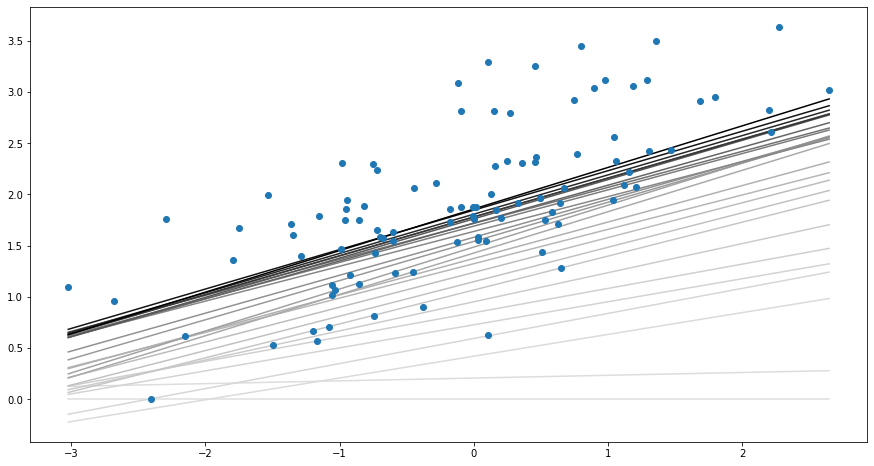

In [5]:
if __name__ == "__main__":
    
    # perform gradient descent
    X = data[:,:-1]
    y = data[:,-1]
    regression_coef = miniBatchGD(X, y)
    
    
    plt.figure(figsize=(15,8))
    
    X_min = X.min()
    X_max = X.max()
    
    counter = len(regression_coef)
    for W, b in regression_coef:
        counter -= 1
        color = [1 - 0.92 ** counter for _ in range(3)]
        plt.plot([X_min, X_max],[X_min * W + b, X_max * W + b], color = color)
    plt.scatter(X, y, zorder = 3)
    plt.show()

## Lesson 2.18 Linear Regression in scikit-learn

- `from sklearn.linear_model import LinearRegression`
- `model = LinearRegression()`
- `model.fit(x_values, y_values)`


### Linear Regression Quiz

The data file can be found under the `"datasets/bmi_and_life_expectancy.csv"` tab in the quiz below. It includes three columns, containing the following data:

- Country – The country the person was born in.
- Life expectancy – The average life expectancy at birth for a person in that country.
- BMI – The mean BMI of males in that country.

In [6]:
import pandas as pd

from sklearn.linear_model import LinearRegression

In [7]:
# Assign the dataframe to this variable.
bmi_life_data = pd.read_csv("datasets/bmi_and_life_expectancy.csv")

X = bmi_life_data[['BMI']]
y = bmi_life_data[['Life expectancy']]

bmi_life_data.head()

,Country,Life expectancy,BMI
0,Afghanistan,52.8,20.62058
1,Albania,76.8,26.44657
2,Algeria,75.5,24.59620
3,Andorra,84.6,27.63048
4,Angola,56.7,22.25083


In [8]:
bmi_life_data.describe()

,Life expectancy,BMI
count,163.000000,163.000000
mean,69.666933,24.792378
std,8.981933,2.427900
min,44.500000,19.866920
25%,63.450000,22.527940
50%,71.800000,25.320540
75%,76.500000,26.603960
max,84.600000,30.995630


In [9]:
# Make and fit the linear regression model

bmi_life_model = LinearRegression()
bmi_life_model.fit(X, y)

LinearRegression()

In [10]:
y_pred = np.array(21.07931).reshape(-1,1)
y_pred.shape

(1, 1)

In [11]:
# Mak a prediction using the model and  Predict life expectancy for a BMI value of 21.07931

laos_life_exp = bmi_life_model.predict(y_pred)
laos_life_exp

array([[60.31564716]])

## Lesson 2.20 Multiple Linear Regression

### N-dimensions
We have $ n -1 $ columns in the input and one in the output. For example, the inputs are size, school quality, number of rooms, et cetera. So for our input, we have  $ n -1 $ variable names: $ x_1, x_2 $ up to $ x_{n-1} $ and for the output of the prediction, we only have one variable $\hat{y} $. Our prediction would be an $n-1$ dimensional hyperplane living in n dimensions. Since it's hard to picture n-dimensions, think of a linear equation in n variables, such as

$ \hat{y} = w_1x_1 + w_2x_2 + ... + w_{n-1}x_{n-1} + w_n $

In order to find the weights $w_1$ up to $w_2 $, the algorithm is exactly the same as it is for two variables. We can either do the absolute or square root tricks, or we can calculate the mean absolute or square errors, and minimize using gradient descent.

<img src="asset/Multiple Regresion.png" width="450" height="450" alt="Multiple Regresion " />



### Multiple Linear Regression Quiz

In this quiz, we'll be using the Boston house-prices dataset. The dataset consists of 13 features of 506 houses and the median home value in $1000's. We'll fit a model on the 13 features to predict the value of the houses.

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

In [13]:
# Load the data from the boston house-prices dataset 

boston_data = load_boston()

x = boston_data['data']
y = boston_data['target']

In [14]:
# Make and fit the linear regression model
# Fit the model and assign it to the model variable

model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [15]:
# Make a prediction using the model
sample_house = [[2.29690000e-01, 0.00000000e+00, 1.05900000e+01, 0.00000000e+00, 4.89000000e-01,
                6.32600000e+00, 5.25000000e+01, 4.35490000e+00, 4.00000000e+00, 2.77000000e+02,
                1.86000000e+01, 3.94870000e+02, 1.09700000e+01]]

# Predict housing price for the sample_house
prediction = model.predict(sample_house)
prediction

array([23.68284712])

## Lesson2.25 Polynomial Regression

In [16]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [17]:
train_data = pd.read_csv('datasets/polynomial .csv')

In [18]:
X = train_data['Var_X'].values.reshape(-1, 1)

y = train_data['Var_Y'].values

In [19]:
# Create a PolynomialFeatures object, then fit and transform the predictor feature

poly_feat = PolynomialFeatures(degree = 4)

X_poly = poly_feat.fit_transform(X)

In [20]:
# Make and fit the polynomial regression model
# Create a LinearRegression object and fit it to the polynomial predictor
# features
poly_model = LinearRegression(fit_intercept = False).fit(X_poly, y)

print(f"Coefficients: {poly_model.coef_}")
print(f"Intercept: {poly_model.intercept_}")

Coefficients: [ 3.37563501 -6.28126025 -2.3787942   0.55307182  0.22699807]
Intercept: 0.0


## Lesson 2.27 Regularization

<img src="asset/RegError.png" width="800" height="450" alt=" " />

Let's look at some data and two models that classify this data.

- The first is a line
- The second is a higher degree polynomial curve.

#### Which one is better?

They both have pros and cons.

- The line makes a couple of mistakes.
- The curve makes zero mistakes but is a bit more complicated.

If we look at the equation of the line, it's much simpler than the polynomial equation. In particular, there are fewer coefficients, only three, four, five whereas the complex polynomial has many more.

<img src="asset/RegComError.png" width="800" height="450" alt=" " />

If we add the coefficients of the line to its error, we get a slightly larger error. But what if we take all of the coefficients of the polynomial and add them to the error, we get a huge error. We can see that the modeling of the line is better because it has a smaller combined error. A simpler model has an edge over a complicated model.

### L1 regularization
**L1 regularization** takes the absolute value of the coefficients of the model and adds them to the error.
<img src="asset/RegL1.png" width="800" height="450" alt=" " />

### L2 regularization
**L2 regularization** is similar to L1 Regularization however instead of adding the absolute values, we add the squares of the coefficients.
<img src="asset/RegL2.png" width="800" height="450" alt=" " />

### The lambda $(λ)$ Parameter
Using $λ$, we multiply the error that comes from the complexity of the model to adjust the overall error.

- With a small lambda, the error that comes from the complexity of the model is not large enough to overtake the errors in the simplified model misclassifying points, so we will choose the complex model.
- With a large value for lambda, we're multiplying the complexity part of the error by a lot. This punishes the complex model more so the simple model wins.

<img src="asset/RegLambda.png" width="800" height="450" alt=" " />

If we have a large lambda then we're punishing complexity by a large amount and we're picking a simpler model. Whereas if we have a small lambda, we're punishing complexity by a small amount, so we're okay with having more complex models.

### L1 or L2 regularization?
So here's a cheat sheet with some benefits for each one.

#### Efficiency
- *(con)* **L1 regularization** is actually computationally inefficient even though it seems simpler because it has no squares, but actually, those absolute values are hard to differentiate.

- *(pro)* Whereas, **L2 regularization** squares have very nice derivatives. So, these are easy to deal with computation.

#### Spare data
- *(pro)* **L1 regularization** is faster than **L2 regularization**. If you have a thousand columns of data but only 10 are relevant and the rest are mostly zeros, then **L1** is faster,

- *(pro)* **L2** is better for non-sparse outputs which are when the data is more equally distributed among the columns.

#### Feature selection
- *(pro)* **L1** has one huge benefit which is that it gives us feature selection. So let's say, we have again, data in a thousand columns but really only 10 of the matters, and the rest are mostly noise. So, **L1** will detect this and will make the relevant columns into zeroes.

- *(con)* **L2** on the other hand won't do this and it just takes the columns and treat them similarly.



In [21]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso

In [22]:
train_data = pd.read_csv('datasets/regularization_data.csv', header = None)

X = train_data.iloc[:,:-1]
y = train_data.iloc[:,-1]

In [23]:
# Create the linear regression model with lasso regularization.
lasso_reg = Lasso()

# Fit the model.
lasso_reg.fit(X, y)

Lasso()

In [24]:
#  Retrieve and print out the coefficients from the regression model.
reg_coef = lasso_reg.coef_

print(reg_coef)

[ 0.          2.35793224  2.00441646 -0.05511954 -3.92808318  0.        ]


## Lesson 2.28 Feature Scaling


What is feature scaling? <br> 
Feature scaling is a way of transforming your data into a common range of values. There are two common scalings:
- Standardizing <br>

`df["height_standard"] = (df["height"] - df["height"].mean()) / df["height"].std()`

- Normalizing

`df["height_normal"] = (df["height"] - df["height"].min()) / df["height"].max() - df['height'].min()) `


[A useful Quora post on the importance of feature scaling when using regularization.](https://www.quora.com/Why-do-we-normalize-the-data)

In [25]:
import numpy as np
import pandas as pd

from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

In [26]:
train_data = pd.read_csv('datasets/regularization_data.csv', header = None)

X = train_data.iloc[:,:-1]
y = train_data.iloc[:,-1]

In [27]:
# Create the standardization scaling object.
scaler = StandardScaler()

# Fit the standardization parameters and scale the data.
X_scaled = scaler.fit_transform(X)

In [28]:
# Create the linear regression model with lasso regularization.
lasso_reg = Lasso()

# Fit the model.
lasso_reg.fit(X_scaled, y)

# Retrieve and print out the coefficients from the regression model.
reg_coef = lasso_reg.coef_
print(reg_coef)

[  0.           3.90753617   9.02575748  -0.         -11.78303187
   0.45340137]
